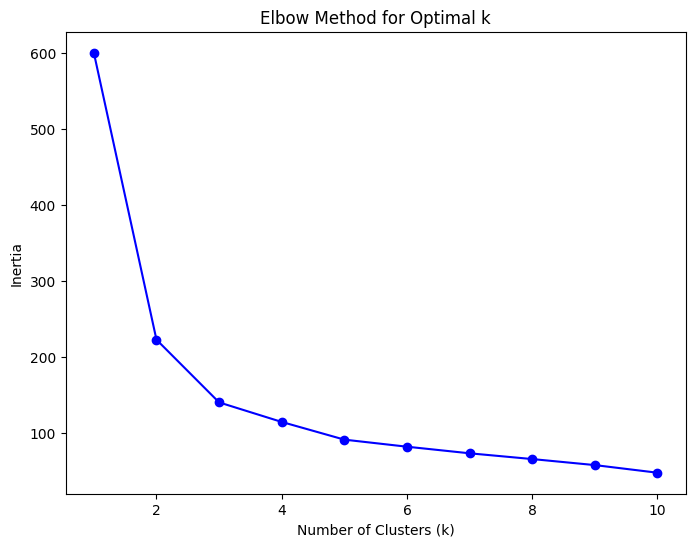

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Iris Dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 3: Data Preprocessing
# Standardize the features to improve K-Means clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Determine the Optimal Number of Clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


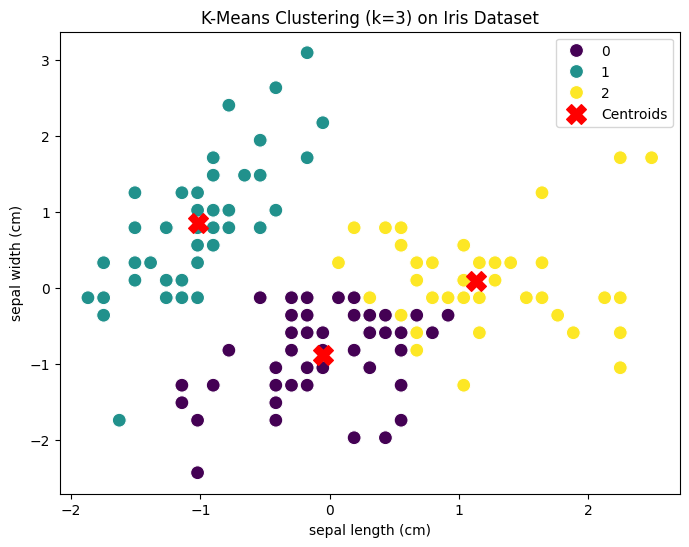

In [7]:

# Step 5: Apply K-Means with Optimal Number of Clusters (k=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Step 6: Visualize Clusters with a Pair Plot
# Convert target labels for comparison (optional)
data['True Label'] = iris.target

# Use only first two features for easy plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering (k=3) on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()